In [5]:
!pip install keras
!pip install tensorflow


You should consider upgrading via the 'C:\Users\l3880\anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)


You should consider upgrading via the 'C:\Users\l3880\anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=0466562d57255c3d803a26ba1dbe929bec8a325d43c57c99430ef754c5151e2b
  Stored in directory: c:\users\l3880\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Load in mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape to each image to a row vector and column vector
x_train_rowvector = np.reshape(x_train, (-1, 28*28))
x_train_colvector = np.copy(x_train_rowvector).T  # every col is an image
x_test_rowvector = np.reshape(x_test, (-1, 28*28))
x_test_colvector = np.copy(x_test_rowvector).T
# Take small sample of 2000 training images
x_train_colvector_sample2000 = x_train_colvector[:, :2000]
y_train_sample2000 = y_train[:2000]
# Take small sample of 200 testing images
x_test_colvector_sample200 = x_test_colvector[:, :200]
y_test_sample200 = y_test[:200]

In [11]:
!pip install opencv-python

  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)


You should consider upgrading via the 'C:\Users\l3880\anaconda3\python.exe -m pip install --upgrade pip' command.


Label:  5


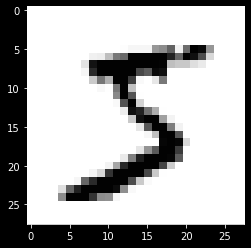

Label:  0


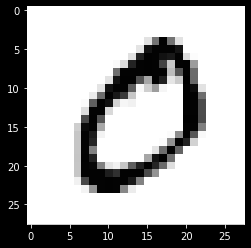

Label:  4


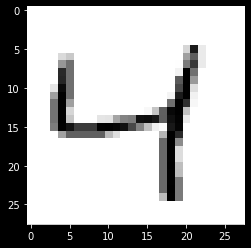

Label:  1


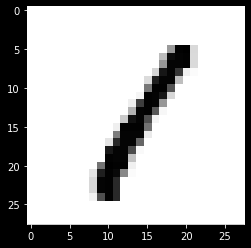

Label:  9


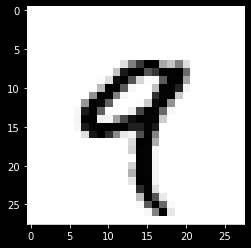

In [4]:

for i in range(5):
    print("Label: ", y_train[i])
    image = x_train_colvector[:, i]
    plt.imshow(image.reshape(28, 28), cmap="Greys")
    plt.show()
    plt.close()

In [18]:
u, s, v = np.linalg.svd(x_train_colvector_sample2000, full_matrices=False)
# if True: (..., M, M)`` and ``(..., N, N)``, respectively. 
# False: the shapes are ``(..., M, K)`` and ``(..., K, N)``
for i in range(2, s.shape[0]):  # become 2 
    s[i] = 0
print(s.shape, v.shape)

svd_cords = np.diag(s) @ v  # 784*2000
svd_cords.shape 


(784,) (784, 2000)


(784, 2000)

In [9]:
svd_list = [0] * 10
for i in range(10):
    svd_list[i] = (svd_cords.T[y_train_sample2000==i])
svd_list[0].shape # (191, 784)

(191, 784)

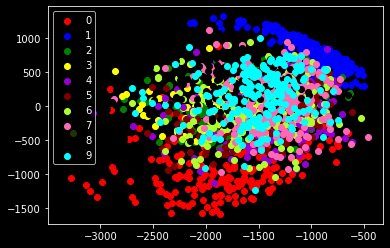

In [13]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    svd_current_label = svd_list[i]
    ax.scatter(svd_current_label[:, 0], svd_current_label[:, 1],
               c=COLORS[i], label=str(i))  
               # svd_current_label[:, 0].shape = 191, 1; 1 is the first pixel in 28 *28

ax.legend()
plt.show()  


In [14]:
svd_mean_list = [0] * 10
for i in range(10): 
    svd_mean_list[i] = np.mean(svd_list[i], axis=0)
svd_mean_list[0].shape

(784,)

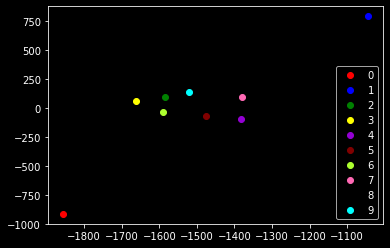

In [15]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    svd_current_label = svd_mean_list[i]
    ax.scatter(svd_current_label[0], svd_current_label[1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()  

## For x_train, y_train 

In [28]:
x_list = [0] *10
y_list = [0] * 10
for i in range(10):
    x_list[i] = (x_train_colvector[:, y_train == i])
    y_list[i] = (y_train[y_train==i])
x_list[1].shape  # (784, 5923)

(784, 6742)

In [22]:
import numpy as np

#################################################################
#################################################################
Visualizing Singular Images for 0
#################################################################
#################################################################
bbbbbbb (784, 5923)


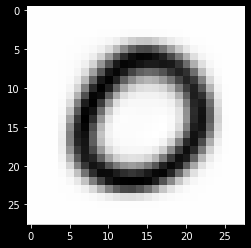

#################################################################
#################################################################
Visualizing Singular Images for 1
#################################################################
#################################################################
bbbbbbb (784, 6742)


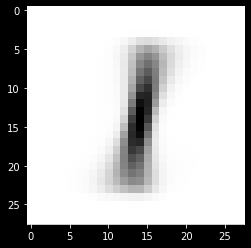

#################################################################
#################################################################
Visualizing Singular Images for 2
#################################################################
#################################################################
bbbbbbb (784, 5958)


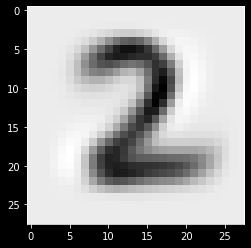

#################################################################
#################################################################
Visualizing Singular Images for 3
#################################################################
#################################################################
bbbbbbb (784, 6131)


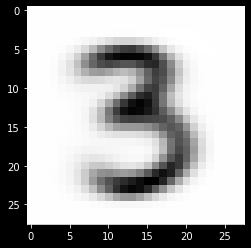

#################################################################
#################################################################
Visualizing Singular Images for 4
#################################################################
#################################################################
bbbbbbb (784, 5842)


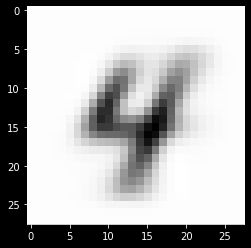

#################################################################
#################################################################
Visualizing Singular Images for 5
#################################################################
#################################################################
bbbbbbb (784, 5421)


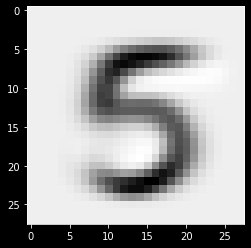

#################################################################
#################################################################
Visualizing Singular Images for 6
#################################################################
#################################################################
bbbbbbb (784, 5918)


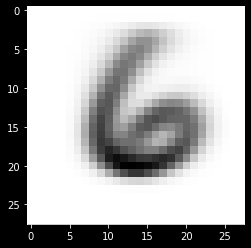

#################################################################
#################################################################
Visualizing Singular Images for 7
#################################################################
#################################################################
bbbbbbb (784, 6265)


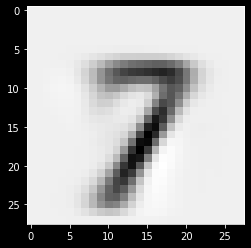

#################################################################
#################################################################
Visualizing Singular Images for 8
#################################################################
#################################################################
bbbbbbb (784, 5851)


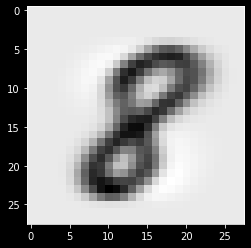

#################################################################
#################################################################
Visualizing Singular Images for 9
#################################################################
#################################################################
bbbbbbb (784, 5949)


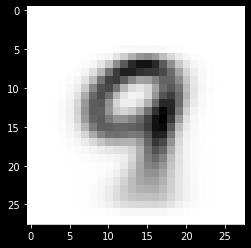

In [29]:
for i in range(10):
    print("#################################################################")
    print("#################################################################")
    print("Visualizing Singular Images for " + str(i))
    print("#################################################################")
    print("#################################################################")
    u, s, v = np.linalg.svd(x_list[i], full_matrices=False)
    for i in range(2, len(s)):
        s[i] = 0
    a = np.matmul(np.diag(s), v)
    # print(a.shape, 'aaaaaaaa')
    b =np.matmul(u, a)
    # print(x_list.shape)
    for j in range(1):
        image = b[:, i]
        plt.imshow(image.reshape(28, 28), cmap="Greys")
        plt.show()
        plt.close()



In [8]:
class Solution(object):
    def isInterleave(self, s1, s2, s3):
        """
        :type s1: str
        :type s2: str
        :type s3: str
        :rtype: bool
        """
        if len(s1) == len(s2) == len(s3)== 0:
            return True
        pos1, pos2, pos3 = 0, 0, 0
        while pos3 < len(s3):
            if pos1 < len(s1) and s1[pos1] == s3[pos3]:
                pos1 += 1
                pos3 += 1
                continue
            if pos2 < len(s2) and s2[pos2] == s3[pos3]:
                pos2 += 1
                pos3 += 1
                continue
            else:
                print(pos1, pos2, pos3)
                return False
        return True
s1 = "aabcc"
s2 = "dbbca"
s3 = "aadbbcbcac"
a = Solution()
a.isInterleave(s1, s2, s3)

5 3 8


False